# Projet MS Economie 

# importation des librairie:
    

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree   
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis

from sklearn.tree import export_graphviz

from sklearn.tree import export_graphviz

Importation des Données : prix carburant 

In [3]:
price_riz = pd.read_csv("historic_groceries.csv", sep =',')

In [4]:
price_riz.head(5)

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
0,Oct-90,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24
1,Nov-90,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22
2,Dec-90,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24
3,Jan-91,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16
4,Feb-91,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14


In [5]:
price_riz.tail(5)

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
355,May-20,0.51,0.21,0.08,0.14,2.05,0.0053,0.83,0.58,NaN,0.0335,0.1120,NaN,NaN,1.97,1.42
356,Jun-20,0.52,0.20,0.08,0.15,2.05,0.0060,0.92,0.66,NaN,0.0346,0.1124,NaN,NaN,1.86,1.42
357,Jul-20,0.48,0.20,0.08,0.15,1.99,0.0060,0.89,0.69,NaN,0.0335,0.1036,NaN,NaN,1.78,1.49
358,Aug-20,0.50,0.20,0.08,0.15,1.30,0.0064,0.98,0.76,NaN,0.0331,0.1021,NaN,NaN,2.00,1.60
359,Sep-20,0.51,0.20,0.08,0.17,1.68,0.0062,1.03,0.80,NaN,0.0324,0.1014,NaN,NaN,2.05,1.60


In [6]:
price_riz

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
0,Oct-90,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24
1,Nov-90,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22
2,Dec-90,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24
3,Jan-91,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16
4,Feb-91,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,May-20,0.51,0.21,0.08,0.14,2.05,0.0053,0.83,0.58,NaN,0.0335,0.1120,NaN,NaN,1.97,1.42
356,Jun-20,0.52,0.20,0.08,0.15,2.05,0.0060,0.92,0.66,NaN,0.0346,0.1124,NaN,NaN,1.86,1.42
357,Jul-20,0.48,0.20,0.08,0.15,1.99,0.0060,0.89,0.69,NaN,0.0335,0.1036,NaN,NaN,1.78,1.49
358,Aug-20,0.50,0.20,0.08,0.15,1.30,0.0064,0.98,0.76,NaN,0.0331,0.1021,NaN,NaN,2.00,1.60


In [7]:
price_riz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          360 non-null    object 
 1   Rice           360 non-null    float64
 2   Wheat          360 non-null    float64
 3   Barley         360 non-null    float64
 4   Corn           360 non-null    float64
 5   Peanuts        360 non-null    float64
 6   Sugar          360 non-null    float64
 7   Coconut-oil    360 non-null    float64
 8   Palm-oil       360 non-null    float64
 9   Sunflower-oil  219 non-null    float64
 10  Chicken        360 non-null    float64
 11  Beef           360 non-null    float64
 12  Pork           321 non-null    float64
 13  Fish           321 non-null    float64
 14  Tea            360 non-null    float64
 15  Coffee         360 non-null    float64
dtypes: float64(15), object(1)
memory usage: 45.1+ KB


In [8]:
price_riz.shape


(360, 16)

In [9]:
price_riz.values


array([['Oct-90', 0.28, 0.11, ..., 6.35, 1.6, 1.24],
       ['Nov-90', 0.27, 0.11, ..., 6.46, 1.58, 1.22],
       ['Dec-90', 0.26, 0.11, ..., 6.5, 1.52, 1.24],
       ...,
       ['Jul-20', 0.48, 0.2, ..., nan, 1.78, 1.49],
       ['Aug-20', 0.5, 0.2, ..., nan, 2.0, 1.6],
       ['Sep-20', 0.51, 0.2, ..., nan, 2.05, 1.6]], dtype=object)

In [10]:
price_riz.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
355    False
356    False
357    False
358    False
359    False
Length: 360, dtype: bool

In [11]:
price_riz.describe()


,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,219.000000,360.000000,360.000000,321.000000,321.000000,360.000000,360.000000
mean,0.356306,0.193028,0.120056,0.149472,1.198500,0.006219,0.828806,0.611944,0.914201,0.036109,0.066228,1.500345,4.806947,2.010944,1.647556
std,0.129793,0.068489,0.046892,0.059426,0.407296,0.002477,0.388402,0.230907,0.288765,0.008409,0.023528,0.396726,1.354028,0.534095,0.632771
min,0.160000,0.100000,0.060000,0.080000,0.620000,0.002400,0.280000,0.230000,0.540000,0.022700,0.036200,0.421100,2.400000,1.240000,0.500000
25%,0.260000,0.140000,0.090000,0.100000,0.897500,0.004400,0.580000,0.420000,0.710000,0.029300,0.046650,1.210600,3.740000,1.537500,1.120000
50%,0.325000,0.180000,0.105000,0.135000,1.100000,0.005700,0.720000,0.585000,0.830000,0.034700,0.057500,1.446200,4.670000,1.910000,1.685000
75%,0.430000,0.220000,0.140000,0.170000,1.370000,0.007500,1.030000,0.750000,0.975000,0.042800,0.089150,1.710300,5.580000,2.392500,2.050000
max,0.910000,0.440000,0.270000,0.330000,2.800000,0.014300,2.260000,1.290000,2.040000,0.060000,0.132300,2.836700,8.640000,3.390000,4.030000


In [12]:
price_riz.isnull()


,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
356,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
357,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
358,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False


In [13]:
price_riz.isnull().sum()


Month              0
Rice               0
Wheat              0
Barley             0
Corn               0
Peanuts            0
Sugar              0
Coconut-oil        0
Palm-oil           0
Sunflower-oil    141
Chicken            0
Beef               0
Pork              39
Fish              39
Tea                0
Coffee             0
dtype: int64

In [14]:
price_riz['Sunflower-oil'].mode()
price_riz['Pork'].mode()
price_riz['Fish'].mode()


0    3.02
1    4.81
2    5.05
dtype: float64

In [15]:
price_riz['Sunflower-oil'].mean()

0.9142009132420091

In [16]:
price_riz['Pork'].mean()

1.5003451713395637

In [17]:
price_riz['Fish'].mean()

4.806947040498442

In [18]:
price_riz['Sunflower-oil'].fillna(price_riz['Sunflower-oil'].mean() , inplace=True)

price_riz['Pork'].fillna(price_riz['Pork'].mean() , inplace=True)

price_riz['Fish'].fillna(price_riz['Fish'].mean(), inplace=True)

In [19]:
price_riz.isnull().sum()


Month            0
Rice             0
Wheat            0
Barley           0
Corn             0
Peanuts          0
Sugar            0
Coconut-oil      0
Palm-oil         0
Sunflower-oil    0
Chicken          0
Beef             0
Pork             0
Fish             0
Tea              0
Coffee           0
dtype: int64

In [20]:
price_riz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          360 non-null    object 
 1   Rice           360 non-null    float64
 2   Wheat          360 non-null    float64
 3   Barley         360 non-null    float64
 4   Corn           360 non-null    float64
 5   Peanuts        360 non-null    float64
 6   Sugar          360 non-null    float64
 7   Coconut-oil    360 non-null    float64
 8   Palm-oil       360 non-null    float64
 9   Sunflower-oil  360 non-null    float64
 10  Chicken        360 non-null    float64
 11  Beef           360 non-null    float64
 12  Pork           360 non-null    float64
 13  Fish           360 non-null    float64
 14  Tea            360 non-null    float64
 15  Coffee         360 non-null    float64
dtypes: float64(15), object(1)
memory usage: 45.1+ KB


In [21]:
encoder = LabelEncoder()

price_riz['Month'] = encoder.fit_transform(price_riz['Month'])

In [22]:
price_riz.describe()

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,179.500000,0.356306,0.193028,0.120056,0.149472,1.198500,0.006219,0.828806,0.611944,0.914201,0.036109,0.066228,1.500345,4.806947,2.010944,1.647556
std,104.067286,0.129793,0.068489,0.046892,0.059426,0.407296,0.002477,0.388402,0.230907,0.225022,0.008409,0.023528,0.374558,1.278366,0.534095,0.632771
min,0.000000,0.160000,0.100000,0.060000,0.080000,0.620000,0.002400,0.280000,0.230000,0.540000,0.022700,0.036200,0.421100,2.400000,1.240000,0.500000
25%,89.750000,0.260000,0.140000,0.090000,0.100000,0.897500,0.004400,0.580000,0.420000,0.800000,0.029300,0.046650,1.248200,3.860000,1.537500,1.120000
50%,179.500000,0.325000,0.180000,0.105000,0.135000,1.100000,0.005700,0.720000,0.585000,0.914201,0.034700,0.057500,1.500345,4.806947,1.910000,1.685000
75%,269.250000,0.430000,0.220000,0.140000,0.170000,1.370000,0.007500,1.030000,0.750000,0.914201,0.042800,0.089150,1.675825,5.432500,2.392500,2.050000
max,359.000000,0.910000,0.440000,0.270000,0.330000,2.800000,0.014300,2.260000,1.290000,2.040000,0.060000,0.132300,2.836700,8.640000,3.390000,4.030000


In [23]:
price_riz.columns



Index(['Month', 'Rice', 'Wheat', 'Barley', 'Corn', 'Peanuts', 'Sugar',
       'Coconut-oil', 'Palm-oil', 'Sunflower-oil', 'Chicken', 'Beef', 'Pork',
       'Fish', 'Tea', 'Coffee'],
      dtype='object')

<AxesSubplot:>

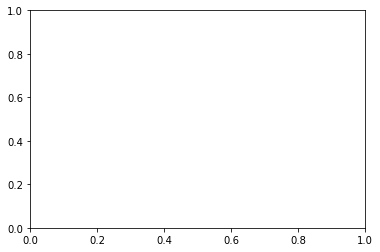

In [24]:
price_riz2 = price_riz.query("Month == 'Oct-20'")
sns.lineplot(data=price_riz2 , x="Month", y="Rice")

<AxesSubplot:xlabel='Month', ylabel='Rice'>

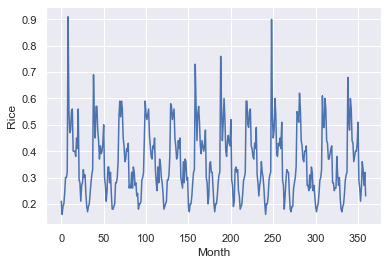

In [25]:

sns.set_theme(style="darkgrid")

sns.lineplot(x="Month", y="Rice",
             data=price_riz)

In [26]:
#sns.set_theme(style="ticks")

#prod=['Month', 'Rice', 'Wheat', 'Barley', 'Corn', 'Peanuts', 'Sugar',
      # 'Coconut-oil', 'Palm-oil', 'Sunflower-oil', 'Chicken', 'Beef', 'Pork',
      # 'Fish', 'Tea', 'Coffee']

#sns.pairplot(price_riz ,hue="prod")

<AxesSubplot:title={'center':'histogramme du prix du riz'}, xlabel='Rice', ylabel='Frequency'>

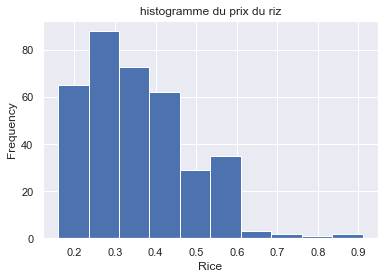

In [27]:

plt.title("histogramme du prix du riz")
plt.xlabel("Rice")
price_riz["Rice"].plot.hist()

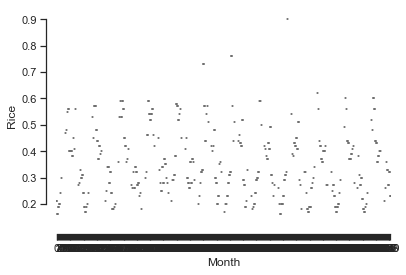

In [28]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Month", y="Rice", palette=["m", "g"],
            data=price_riz)
sns.despine(offset=10, trim=True)

In [29]:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 20 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        ) 
    


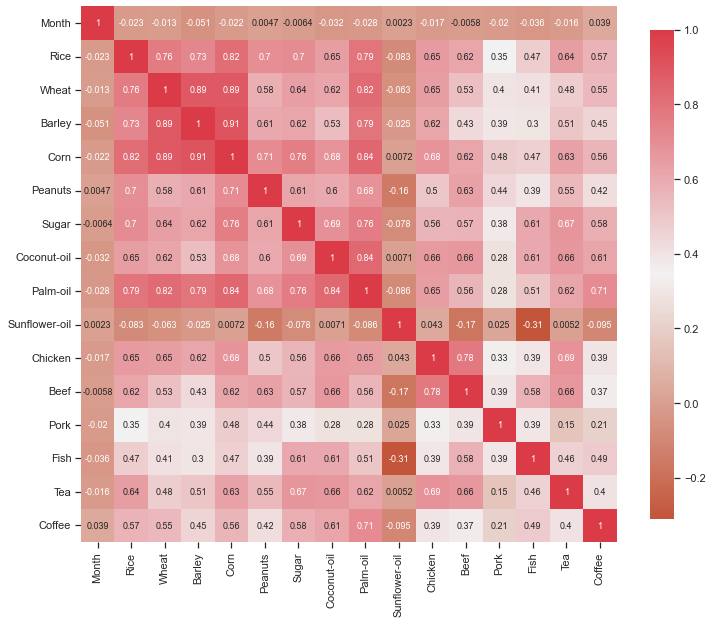

In [30]:
plot_correlation_map(price_riz)

In [31]:
#  6 : REGRESSION multi-LINEAIRE

X=price_riz[['Wheat','Barley', 'Corn','Palm-oil', 'Chicken', 'Beef','Month']]
Y=price_riz['Rice']
X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.15, random_state=10)

model=LinearRegression() 
model.fit(X_train,Y_train)
predicted=model.predict(X_test)
# performance

print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))

model.score(X, Y)

MSE 0.004351387020966884
R squared 0.7198009788549824


0.7280389558364534

In [34]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [35]:
import numpy as np
import pandas as pd
from flask import Flask, request, render_template
from sklearn import preprocessing
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    feature_list = request.form.to_dict()
    feature_list = list(feature_list.values())
    feature_list = list(map(int, feature_list))
    final_features = np.array(feature_list).reshape(1, 12) 
    
    prediction = model.predict(final_features)
    output = int(prediction[0])
    if output == 1:
        text = ">50K"
    else:
        text = "<=50K"

    return render_template('index.html', prediction_text='Employee Income is {}'.format(text))


if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 632, in initialize
    self.init_sockets()
  File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 282, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, self.shell_port)
  File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 229, in _bind_socket
    return self._try_bind_socket(s, port)
  File "/opt

SystemExit: 1

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
